In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity

# Data Gathering

In [46]:
df = pd.read_csv('final_perfume_data.csv', encoding = 'unicode_escape')
df.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


In [47]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         2191 non-null   object
 1   Brand        2191 non-null   object
 2   Description  2191 non-null   object
 3   Notes        2111 non-null   object
 4   Image URL    2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


Dataset yang digunakan berisi 2.191 entri parfum dengan 5 variabel utama:
1. `Name`: Nama parfum (2.184 nilai unik)
2. `Brand`: Merek produsen parfum (249 nilai unik)
3. `Description`: Deskripsi tekstual tentang parfum (2.167 nilai unik)
4. `Notes`: Komposisi karakteristik aroma dalam parfum (2.053 nilai unik, 4% missing value)
5. `Image URL`: URL gambar produk parfum (2.191 nilai unik)

# Data Understanding

### 1. Distribusi Merek

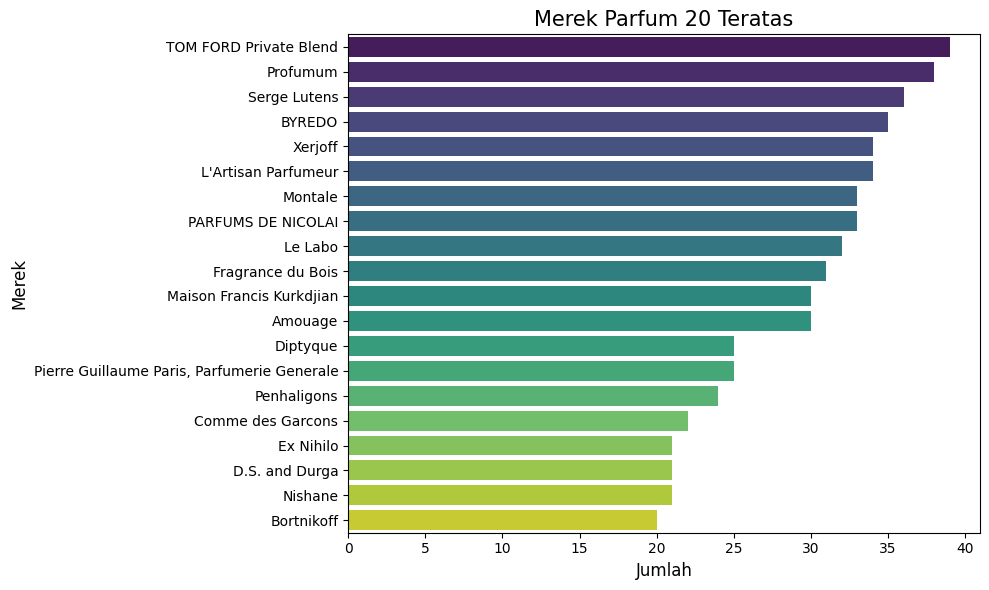

Persentase parfum dari 20 merek teratas: 26.65%


In [48]:
# Menampilkan distribusi merek parfum teratas
plt.figure(figsize=(10, 6))
brand_counts = df['Brand'].value_counts().head(20)
sns.barplot(x=brand_counts.values, y=brand_counts.index, hue=brand_counts.index, palette='viridis', legend=False)
plt.title('Merek Parfum 20 Teratas', fontsize=15)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Merek', fontsize=12)
plt.tight_layout()
plt.show()

# Menghitung persentase dari total untuk brand terpopuler
top_brands_percentage = (brand_counts.sum() / len(df)) * 100
print(f"Persentase parfum dari 20 merek teratas: {top_brands_percentage:.2f}%")

In [49]:
print("Brand parfum terpopuler:")
print(brand_counts.head(10))

Brand parfum terpopuler:
Brand
TOM FORD Private Blend    39
Profumum                  38
Serge Lutens              36
BYREDO                    35
Xerjoff                   34
L'Artisan Parfumeur       34
Montale                   33
PARFUMS DE NICOLAI        33
Le Labo                   32
Fragrance du Bois         31
Name: count, dtype: int64


Berdasarkan visualisasi, TOM FORD Private Blend menduduki posisi teratas dengan hampir 40 parfum dalam dataset, diikuti oleh Profumum dan Serge Lutens. Merek-merek premium seperti BYREDO, Xerjoff, L'Artisan Parfumeur, dan Montale memiliki representasi tinggi, menunjukkan bahwa dataset lebih condong pada segmen parfum kelas atas.

### 2. Word Cloud Aroma

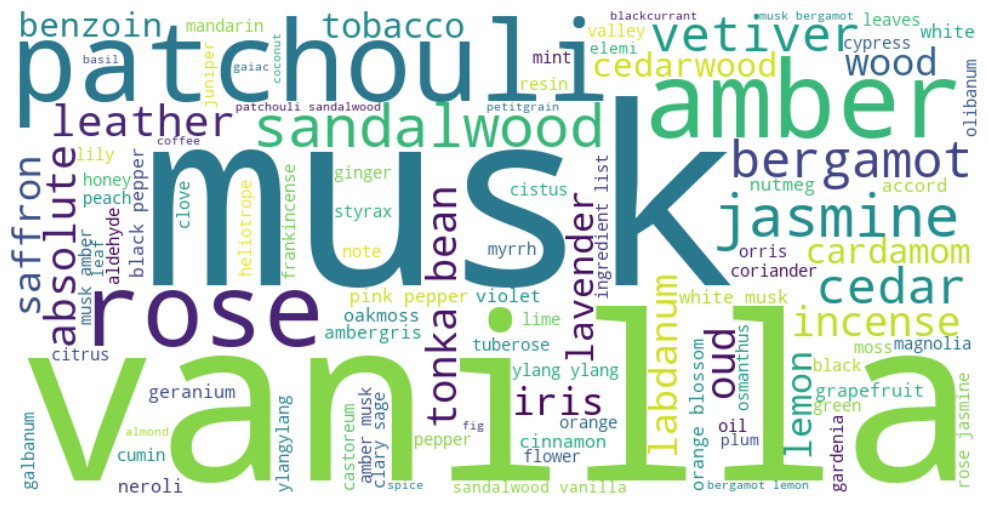

In [50]:
# Get all notes as a single string
all_notes = ', '.join(df['Notes'].dropna().astype(str))

# Clean and tokenize
all_notes = re.sub(r'[^\w\s,]', '', all_notes.lower())
all_notes_list = [note.strip() for note in all_notes.split(',')]

# Buat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_notes)

# Tampilkan wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

Wordcloud menunjukkan dominasi beberapa aroma kunci dalam komposisi parfum: "musk", "rose", "vanilla", "patchouli", dan "sandalwood" terlihat sebagai aroma yang paling menonjol dalam dataset. Terdapat keseimbangan antara berbagai kategori aroma: floral (rose, jasmine), woody (sandalwood, cedar, oud), gourmand (vanilla), dan earthy (patchouli, vetiver), menunjukkan keragaman komposisi parfum dalam dataset.

### 3. Aroma Terpopuler

In [51]:
# Plot the most common notes overall
notes_counter = Counter(all_notes_list)

all_notes_freq = notes_counter.most_common(15)
all_notes_df = pd.DataFrame(all_notes_freq, columns=['Note', 'Frequency'])

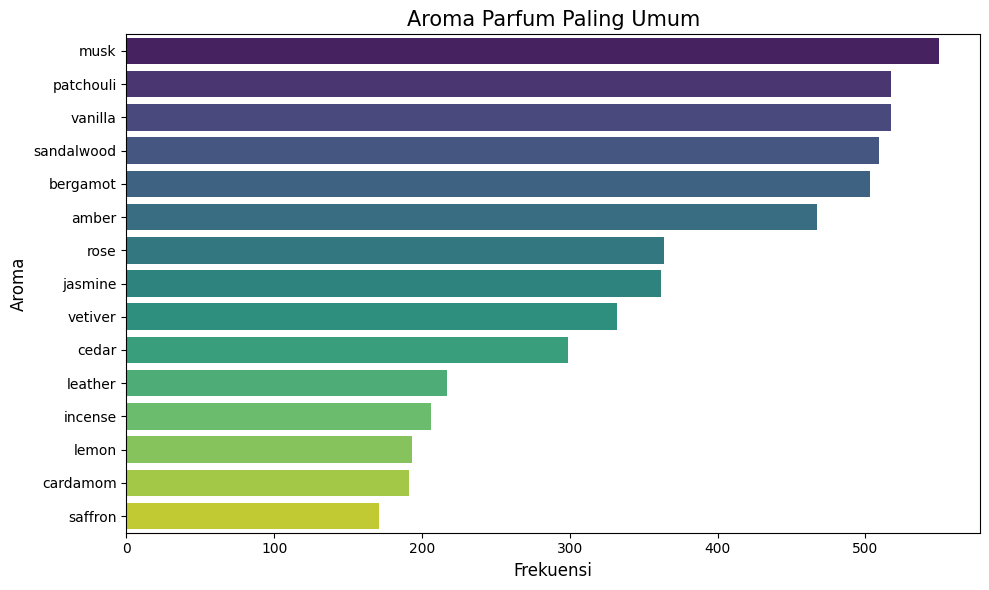

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Note', hue='Note', data=all_notes_df, palette='viridis', legend=False)
plt.title('Aroma Parfum Paling Umum', fontsize=15)
plt.xlabel('Frekuensi', fontsize=12)
plt.ylabel('Aroma', fontsize=12)
plt.tight_layout()
plt.show()

In [53]:
print("Aroma yang paling umum:")
for note, freq in all_notes_freq:
    print(f"{note}: {freq}")

Aroma yang paling umum:
musk: 550
patchouli: 517
vanilla: 517
sandalwood: 509
bergamot: 503
amber: 467
rose: 364
jasmine: 362
vetiver: 332
cedar: 299
leather: 217
incense: 206
lemon: 193
cardamom: 191
saffron: 171


"musk" merupakan aroma paling dominan dalam dataset dengan frekuensi kemunculan tertinggi (>500 kali). Lima aroma teratas didominasi oleh kombinasi dari woody dan oriental notes: "musk", "patchouli", "vanilla", "sandalwood", dan "bergamot", yang menggambarkan preferensi pasar terhadap aroma yang kompleks, hangat, dan tahan lama.

### 4. Distribusi Jumlah Aroma

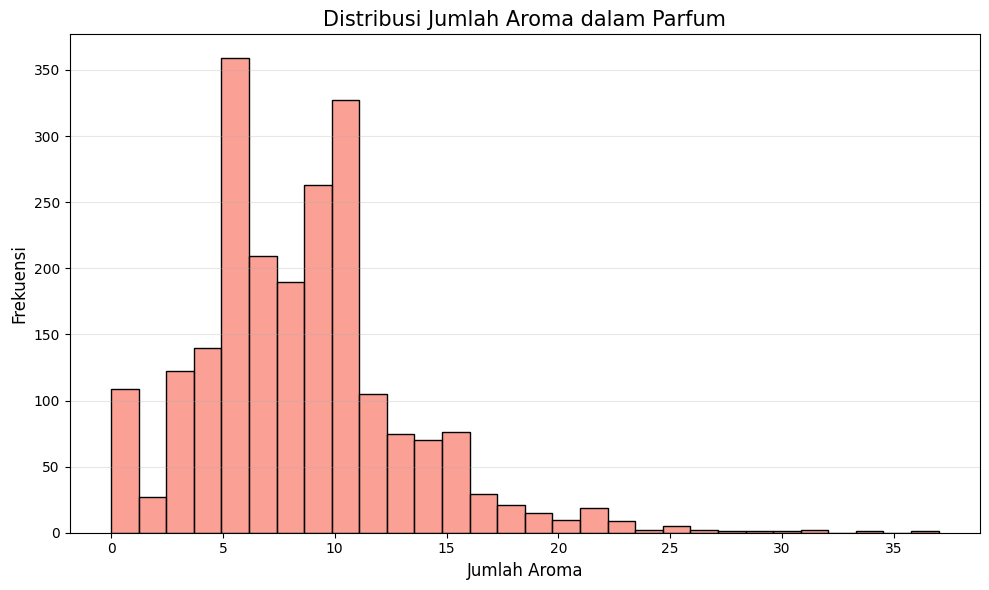

Statistik Deskriptif untuk Jumlah Aroma:
count    2191.000000
mean        8.465084
std         4.632675
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        37.000000
Name: Notes_Count, dtype: float64

Parfum dengan nol aroma: 80 (3.65%)
Parfum dengan lebih dari 15 aroma: 159 (7.26%)
Median jumlah aroma per parfum: 8.0


In [54]:
# Hitung jumlah notes
df['Notes_Count'] = df['Notes'].apply(lambda x: len(str(x).split(',')) if not pd.isna(x) else 0)

# Visualisasi distribusi jumlah notes
plt.figure(figsize=(10, 6))
sns.histplot(df['Notes_Count'], bins=30, color='salmon')
plt.title('Distribusi Jumlah Aroma dalam Parfum', fontsize=15)
plt.xlabel('Jumlah Aroma', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Statistik deskriptif untuk jumlah aroma
notes_stats = df['Notes_Count'].describe()
print("Statistik Deskriptif untuk Jumlah Aroma:")
print(notes_stats)

# Tambahan analisis untuk aroma count
print(f"\nParfum dengan nol aroma: {(df['Notes_Count'] == 0).sum()} ({(df['Notes_Count'] == 0).sum()/len(df)*100:.2f}%)")
print(f"Parfum dengan lebih dari 15 aroma: {(df['Notes_Count'] > 15).sum()} ({(df['Notes_Count'] > 15).sum()/len(df)*100:.2f}%)")
print(f"Median jumlah aroma per parfum: {df['Notes_Count'].median()}")


Mayoritas parfum dalam dataset memiliki antara 5-10 aroma dalam komposisinya, dengan puncak distribusi berada di sekitar 6-7 aroma per parfum. Distribusi ini mencerminkan filosofi parfumeri modern yang seimbang antara kompleksitas dan kejelasan karakter aroma.

# Data Preparation

### 1. Penanganan Missing Value

In [55]:
missing_values = df.isna().sum()
print("Missing Values per Kolom:")
print(missing_values)
print(f"\nPersentase missing values pada kolom Notes: {missing_values['Notes']/len(df)*100:.2f}%")

Missing Values per Kolom:
Name            0
Brand           0
Description     0
Notes          80
Image URL       0
Notes_Count     0
dtype: int64

Persentase missing values pada kolom Notes: 3.65%


In [56]:
df_clean = df.dropna(subset=['Notes']).copy()

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2111 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         2111 non-null   object
 1   Brand        2111 non-null   object
 2   Description  2111 non-null   object
 3   Notes        2111 non-null   object
 4   Image URL    2111 non-null   object
 5   Notes_Count  2111 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 115.4+ KB


Menghapus baris dengan missing values adalah pendekatan yang paling tepat karena jumlah missing values relatif kecil (4%) dan aroma adalah fitur krusial untuk sistem rekomendasi parfum.

### 2. Normalisasi Teks

In [58]:
# Fungsi untuk membersihkan dan menormalisasi teks
def normalize_text(text):
    if pd.isna(text):
        return text
    
    # Konversi ke lowercase
    text = text.lower()
    
    # Hapus karakter khusus dan angka
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [59]:
# Terapkan normalisasi ke kolom Description dan Notes menggunakan .loc
df_clean.loc[:, 'Notes_Normalized'] = df_clean['Notes'].apply(normalize_text)

# Contoh hasil normalisasi
print("Sebelum normalisasi:")
df_clean['Notes'].iloc[1]

Sebelum normalisasi:


' Lavender, Yuzu, Lemongrass, Magnolia, Geranium, Jasmine, Frankincense, Myrrh'

In [60]:
print("\nSetelah normalisasi:")
df_clean['Notes_Normalized'].iloc[1]


Setelah normalisasi:


'lavender yuzu lemongrass magnolia geranium jasmine frankincense myrrh'

In [61]:
df_clean.head()

,Name,Brand,Description,Notes,Image URL,Notes_Count,Notes_Normalized
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...,2,vanilla bean musks
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...,8,lavender yuzu lemongrass magnolia geranium jas...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...,12,green yuzu green shikuwasa sansho seed coriand...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...,14,tangerine pink pepper black coffee leather vio...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...,8,bergamot almond violet jasmine leather sandalw...


In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2111 entries, 0 to 2190
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              2111 non-null   object
 1   Brand             2111 non-null   object
 2   Description       2111 non-null   object
 3   Notes             2111 non-null   object
 4   Image URL         2111 non-null   object
 5   Notes_Count       2111 non-null   int64 
 6   Notes_Normalized  2111 non-null   object
dtypes: int64(1), object(6)
memory usage: 131.9+ KB


### TF-IDF Vectorization

In [63]:
tfidf_vectorizer = TfidfVectorizer(
  min_df=2,
  max_df=0.9,
  max_features=1000,
  ngram_range=(1, 2)
  )
tfidf_matrix = tfidf_vectorizer.fit_transform(df_clean['Notes_Normalized'])

- Parameter min_df=2 menghilangkan kata yang sangat jarang (muncul di kurang dari 2 dokumen).
- Parameter max_df=0.9 menghilangkan kata yang terlalu umum (muncul di lebih dari 90% dokumen).
- Parameter max_features=1000 membatasi jumlah fitur yang diambil menjadi 1000 kata paling penting.
- Parameter ngram_range=(1, 2) memungkinkan penangkapan unigram (kata tunggal) dan bigram (2 kata berurutan).

Data siap digunakan untuk pemodelan sistem rekomendasi berbasis konten. Dataset telah dibersihkan dari missing values dan dinormalisasi untuk memastikan kualitas data yang optimal.

# Modeling

### Cosine Similarity

In [64]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"Shape dari Cosine Similarity Matrix: {cosine_sim.shape}")

Shape dari Cosine Similarity Matrix: (2111, 2111)


### Sistem Rekomendasi

In [65]:
def recommend_perfume(name, top_n=5):
    # Cari index parfum di df_clean yang digunakan saat modelling
    idx = df_clean[df_clean['Name'].str.lower() == name.lower()].index
    if len(idx) == 0:
        return f"Parfum '{name}' tidak ditemukan."
    idx = idx[0]

    # Ambil skor similarity dan sortir
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Lewati dirinya sendiri

    # Ambil nama-nama parfum yang mirip dan similarity scores
    perfume_indices = [i[0] for i in sim_scores]
    return df_clean[['Name', 'Brand', 'Notes']].iloc[perfume_indices], [i[1] for i in sim_scores]

### Top 10 Rekomendasi

In [66]:
name = "Tihota Eau de Parfum"
brand = df[df['Name'].str.lower() == name.lower()]['Brand'].values[0]
notes = df[df['Name'].str.lower() == name.lower()]['Notes'].values[0]
recommendations, scores = recommend_perfume(name, top_n=15)

# gabungkan hasil rekomendasi dengan skor similarity
recommendations['Similarity Score'] = scores

print(f"\nRekomendasi parfum mirip dengan: {name} ({brand}) - {notes}")
recommendations


Rekomendasi parfum mirip dengan: Tihota Eau de Parfum (Indult) -  Vanilla bean, musks


,Name,Brand,Notes,Similarity Score
1964,Fat Electrician Eau de Parfum,Etat Libre d'Orange,"vetiver, vanilla bean, opoponax and myrrh",0.521278
5,Freckled and Beautiful Eau de Parfum,A Lab on Fire,"Orange flower, neroli, honeysuckle, warm milk...",0.423597
1146,Rausch Eau de Parfum,J.F. Schwarzlose,"Red pepper, sandalwood, cypriol, patchouli, v...",0.406882
984,Charlatan Eau de Parfum,Fort & Manle,"Pear, chocolate, perigord truffle, rose, jasm...",0.374431
987,Fatih Sultan Mehmed Eau de Parfum,Fort & Manle,"Bergamot, apple, petitgrain, rose, tulip, iri...",0.354547
1035,My Own Private Teahupo'o Eau de Parfum,A Lab on Fire,"Sea salt, ozone, frangipani, salicylates, Tah...",0.354197
1568,Made in Heaven Eau de Parfum,A Lab on Fire,"Safran, magnolia petals, Italian mandarin, ja...",0.351287
1668,Fate Woman,Amouage,"Bergamot, cinnamon, chilli, pepper, rose, nar...",0.332233
555,Murmure des Dieux Eau de Parfum,Une Nuit Nomade,"Frangipani, Almond, Vanilla, Musks",0.315857
125,Muskara Phero J Eau de Parfum,Fueguia 1833,"musks ""from the pheromone family""",0.310628


Pada contoh ini, sistem merekomendasikan 10 parfum teratas yang paling mirip dengan parfum "Tihota Eau de Parfum". Hasil rekomendasi menunjukkan bahwa parfum-parfum yang direkomendasikan memiliki kesamaan yang tinggi dengan parfum input, berdasarkan karakteristik aroma mereka.

# Evaluation

Proses evaluasi sistem rekomendasi dilakukan dengan menggunakan metrik Precision dan Recall. Metrik ini memberikan gambaran yang jelas tentang seberapa baik sistem dalam merekomendasikan parfum yang relevan kepada pengguna. Semakin tinggi nilai Precision dan Recall, semakin baik sistem dalam memberikan rekomendasi yang sesuai dengan preferensi pengguna. Penggunaan treshold 0.2, 0.3, 0.4 untuk cosine similarity membantu dalam menyaring rekomendasi yang kurang relevan, sehingga hanya parfum-parfum dengan kesamaan yang signifikan yang ditampilkan kepada pengguna. Dengan demikian, sistem rekomendasi ini diharapkan dapat memberikan pengalaman yang lebih personal dan memuaskan bagi pengguna dalam menemukan parfum yang sesuai dengan selera mereka.


In [74]:
def calculate_precision_at_k(scores, threshold=0.3, k=10):
    relevant_count = sum(1 for score in scores[:k] if score >= threshold)
    precision = relevant_count / k
    return precision

In [75]:
def recall_at_k(scores, threshold=0.3, k=10):
    relevant_count = sum(1 for score in scores if score >= threshold)
    retrieved_count = sum(1 for score in scores[:k] if score >= threshold)
    recall = retrieved_count / relevant_count if relevant_count > 0 else 0
    return recall


In [ ]:
# Define a function for more comprehensive evaluation
def evaluate_recommendation_system(perfume_names, thresholds=[0.2, 0.3, 0.4], k_values=[5, 10, 15]):
    results = {}
    
    for name in perfume_names:
        try:
            _, scores = recommend_perfume(name, top_n=max(k_values))
            
            for threshold in thresholds:
                for k in k_values:
                    precision = calculate_precision_at_k(scores, threshold=threshold, k=k)
                    recall = recall_at_k(scores, threshold=threshold, k=k)
                    
                    key = f"{name}_threshold{threshold}_k{k}"
                    results[key] = {
                        'precision': precision,
                        'recall': recall
                    }
        except:
            print(f"Error evaluating: {name}")
            
    return results

# Sample 20 random perfumes for evaluation
sample_perfumes = df_clean['Name'].sample(20).tolist()
evaluation_results = evaluate_recommendation_system(sample_perfumes)

# Summarize results
avg_precision = {}
avg_recall = {}

for threshold in [0.2, 0.3, 0.4]:
    for k in [5, 10, 15]:
        relevant_keys = [key for key in evaluation_results.keys() if f"_threshold{threshold}_k{k}" in key]
        avg_p = sum(evaluation_results[key]['precision'] for key in relevant_keys) / len(relevant_keys)
        avg_r = sum(evaluation_results[key]['recall'] for key in relevant_keys) / len(relevant_keys)
        
        print(f"Threshold {threshold}, k={k}: Avg Precision = {avg_p:.2f}, Avg Recall = {avg_r:.2f}")

Threshold 0.2, k=5: Avg Precision = 1.00, Avg Recall = 0.33
Threshold 0.2, k=10: Avg Precision = 1.00, Avg Recall = 0.67
Threshold 0.2, k=15: Avg Precision = 1.00, Avg Recall = 1.00
Threshold 0.3, k=5: Avg Precision = 0.89, Avg Recall = 0.68
Threshold 0.3, k=10: Avg Precision = 0.70, Avg Recall = 0.89
Threshold 0.3, k=15: Avg Precision = 0.57, Avg Recall = 1.00
Threshold 0.4, k=5: Avg Precision = 0.32, Avg Recall = 0.62
Threshold 0.4, k=10: Avg Precision = 0.18, Avg Recall = 0.63
Threshold 0.4, k=15: Avg Precision = 0.14, Avg Recall = 0.65
